In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import factorial
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.setrecursionlimit(200000)

randomly generate ER networks:
> The Erd ̈os-R ́enyi(ER) network is a random graph obtained by randomly distributing M links betweenN nodes, being a statistical ensemble with equal probability for any generated configuration.

In [2]:
from utils import ERNetwork

In [3]:
net = ERNetwork(node_nums=5000, lam=3)
net.initialize()

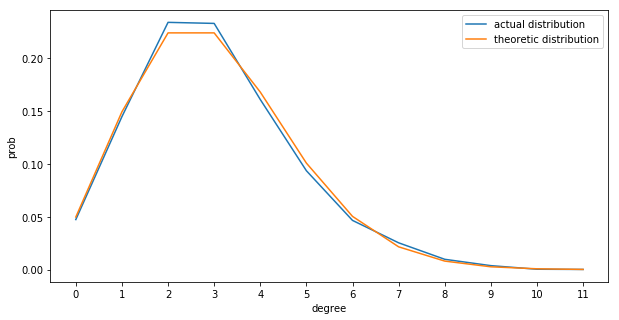

In [4]:
plt.figure(figsize=(10, 5))
degrees = net.degree_distrib()

cnt = np.histogram(degrees, bins=np.arange(0, np.max(degrees)+2))

cnt = cnt[0] / net.node_nums
plt.plot(cnt, label='actual distribution')

pk_er = lambda x, l : np.exp(-l) * (l ** x) / factorial(x) 
draws = [pk_er(i, net.lam) for i in range(np.max(degrees)+1)]

plt.plot(draws, label='theoretic distribution')
_ = plt.xticks(np.arange(np.max(degrees)+1))

plt.xlabel('degree')
plt.ylabel('prob')

plt.legend()

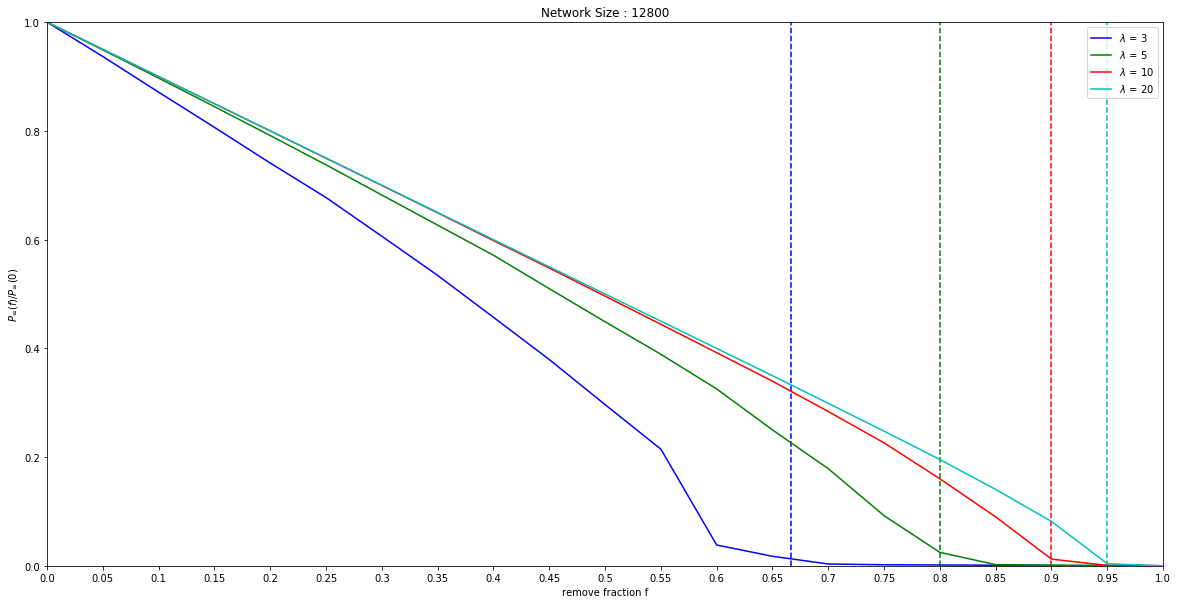

In [14]:
delta = 0.05
iters = int(1 / delta)
basis = 0

plt.figure(figsize=(20, 10))
colors = ['b', 'g', 'r', 'c']
for idx, l in enumerate([3, 5, 10, 20]):
    net = ERNetwork(node_nums=12800, lam=l)
    net.initialize()
    cluster_sizes = []
    belongs = net.bfs()
    max_cluster_size = np.unique(belongs, return_counts=True)[1].max()
    cluster_sizes.append(max_cluster_size)

    for i in range(iters):
        fraction = basis + (i+1)*delta
    #     print('REMOVING FRACTION {:.3f}'.format(fraction))
        net.remove_nodes(delta)
        belongs = net.bfs()
        max_cluster_size = np.unique(belongs, return_counts=True)[1].max()
        cluster_sizes.append(max_cluster_size)
    cluster_sizes = np.array(cluster_sizes)
    cluster_sizes = cluster_sizes / cluster_sizes[0]

    # belongs = net.bfs()
    plt.plot(cluster_sizes, label=r'$\lambda$ = {}'.format(l), color=colors[idx])
    plt.vlines(x= iters * (1 - 1.0 / l), ymin=0, ymax=1, linestyles='dashed', colors=colors[idx])

plt.ylabel(r'${P_\infty(f)} / {P_\infty(0)}$')    
plt.xlabel(r'remove fraction f')    
plt.xticks(ticks=np.arange(0, iters+1), labels=np.arange(0, iters+1) / iters)
plt.xlim(0, iters)
plt.ylim(0, 1)
plt.legend()
plt.title('Network Size : {}'.format(net.node_nums))
plt.savefig('./pics/ser.png')